<a href="https://colab.research.google.com/github/biglool/TFG_ALZEIMER/blob/main/Experiment2i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
TFG_DATA= '/content/drive/MyDrive/TFG_DATA/'
DATASET = 'ADNI_PROC/'
DS_INFO ='Info.csv'
PROBLEMTYPE = 'CNvsAD'#'CNvsMCI'

Mounted at /content/drive


In [ ]:
!rm -rf tfg
!git clone -l -s https://github.com/biglool/TFG_ALZEIMER/ tfg


Cloning into 'tfg'...
remote: Enumerating objects: 674, done.
remote: Counting objects: 100% (674/674), done.
remote: Compressing objects: 100% (673/673), done.
remote: Total 674 (delta 316), reused 15 (delta 0), pack-reused 0
Receiving objects: 100% (674/674), 135.16 KiB | 5.63 MiB/s, done.
Resolving deltas: 100% (316/316), done.


In [ ]:
import torch
from tfg.code import database,training, trainingSteps, ensamble
from tabulate import tabulate
import os


In [ ]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
#torch.cuda.memory_summary(device=None)

1
Tesla P100-PCIE-16GB


# **Part 1**: Busquem els millors talls i el epoch.

In [ ]:
cuts=[]

for sag in range(1,4):
  for axial in range(1,6):
    for coro in range(1,4):

      nom="cut_"+str(sag)+ "_"+str(axial)+"_"+str(coro)+".pt"
      cuts.append([nom,[sag,axial,coro]])
print(cuts)

[['cut_1_1_1.pt', [1, 1, 1]], ['cut_1_1_2.pt', [1, 1, 2]], ['cut_1_1_3.pt', [1, 1, 3]], ['cut_1_2_1.pt', [1, 2, 1]], ['cut_1_2_2.pt', [1, 2, 2]], ['cut_1_2_3.pt', [1, 2, 3]], ['cut_1_3_1.pt', [1, 3, 1]], ['cut_1_3_2.pt', [1, 3, 2]], ['cut_1_3_3.pt', [1, 3, 3]], ['cut_1_4_1.pt', [1, 4, 1]], ['cut_1_4_2.pt', [1, 4, 2]], ['cut_1_4_3.pt', [1, 4, 3]], ['cut_1_5_1.pt', [1, 5, 1]], ['cut_1_5_2.pt', [1, 5, 2]], ['cut_1_5_3.pt', [1, 5, 3]], ['cut_2_1_1.pt', [2, 1, 1]], ['cut_2_1_2.pt', [2, 1, 2]], ['cut_2_1_3.pt', [2, 1, 3]], ['cut_2_2_1.pt', [2, 2, 1]], ['cut_2_2_2.pt', [2, 2, 2]], ['cut_2_2_3.pt', [2, 2, 3]], ['cut_2_3_1.pt', [2, 3, 1]], ['cut_2_3_2.pt', [2, 3, 2]], ['cut_2_3_3.pt', [2, 3, 3]], ['cut_2_4_1.pt', [2, 4, 1]], ['cut_2_4_2.pt', [2, 4, 2]], ['cut_2_4_3.pt', [2, 4, 3]], ['cut_2_5_1.pt', [2, 5, 1]], ['cut_2_5_2.pt', [2, 5, 2]], ['cut_2_5_3.pt', [2, 5, 3]], ['cut_3_1_1.pt', [3, 1, 1]], ['cut_3_1_2.pt', [3, 1, 2]], ['cut_3_1_3.pt', [3, 1, 3]], ['cut_3_2_1.pt', [3, 2, 1]], ['cut_3_2_2.p

In [ ]:

EXPERIMENTFOLDER ='Classifiers/'
num_epochs = 40
paciencia=15
carpeta = TFG_DATA+PROBLEMTYPE+"/"+EXPERIMENTFOLDER
dataset = database.ADNI_Dataset( DS_INFO ,TFG_DATA + DATASET)
dataset.setProblem(PROBLEMTYPE)

resultats=[]
train_idx,valid_idx,test_idx = trainingSteps.getSplits(dataset)

# definit per el resultat de l'experiment anterior
model= 'Densenet201'
batch_size=64
lr =  0.00005

for cut in cuts:
  nom=cut[0]
  if not os.path.exists(carpeta+nom):
    training.createExperiment(carpeta,nom,PROBLEMTYPE,cut[1],train_idx,test_idx,model,lr,batch_size,valid_idx,paciencia,num_epochs)
    
for cut in cuts:
  nom=cut[0]

  print("Training...:"+carpeta+ nom )
  training.trainExperiment(carpeta, nom, device, dataset, metrica ="f1",earlyStop=True)

  print("Resultat:") 
  resultat=training.validateModel(carpeta, nom, device, dataset, verbose=True)
  resultats.append(cut+resultat)

print("Resultats finals:")
print(tabulate(resultats, headers=["nom","cut","Epoch","Loss", "Acc","BAcc","SEN","SPE","PRE","F1","AUC"]))


Training...:/content/drive/MyDrive/TFG_DATA/CNvsAD/WClassifiers/cut_1_1_1.pt
Resultat:
epoch:
4
Loss: 0.704 | Acc: 0.442 | BAcc: 0.500 | SEN: 1.000 | SPE: 0.000 | PRE: 0.442 | F1: 0.613 | AUC: 0.500
Training...:/content/drive/MyDrive/TFG_DATA/CNvsAD/WClassifiers/cut_1_1_2.pt
Resultat:
epoch:
4
Loss: 0.733 | Acc: 0.442 | BAcc: 0.500 | SEN: 1.000 | SPE: 0.000 | PRE: 0.442 | F1: 0.613 | AUC: 0.500
Training...:/content/drive/MyDrive/TFG_DATA/CNvsAD/WClassifiers/cut_1_1_3.pt
Resultat:
epoch:
1
Loss: 0.694 | Acc: 0.442 | BAcc: 0.500 | SEN: 1.000 | SPE: 0.000 | PRE: 0.442 | F1: 0.613 | AUC: 0.500
Training...:/content/drive/MyDrive/TFG_DATA/CNvsAD/WClassifiers/cut_1_2_1.pt
Resultat:
epoch:
4
Loss: 0.713 | Acc: 0.442 | BAcc: 0.500 | SEN: 1.000 | SPE: 0.000 | PRE: 0.442 | F1: 0.613 | AUC: 0.500
Training...:/content/drive/MyDrive/TFG_DATA/CNvsAD/WClassifiers/cut_1_2_2.pt
Resultat:
epoch:
12
Loss: 0.541 | Acc: 0.740 | BAcc: 0.734 | SEN: 0.676 | SPE: 0.791 | PRE: 0.719 | F1: 0.697 | AUC: 0.734
Trai

KeyboardInterrupt: ignored

# **Part 2:**Cross-validem les configuracions seleccionades.

In [ ]:
#top 10 f1, es pot automatitzar..
cutsCNvsMCI=[['cut_2_3_2',[2,3,2] ,12],
        ['cut_2_2_2',[2,2,2] ,10],
        ['cut_1_3_2',[1,3,2] ,19],
        ['cut_2_1_2',[2,1,2] ,25],
        ['cut_1_2_1',[1,2,1] ,12],
        ['cut_2_4_1',[2,4,1] ,25],
        ['cut_3_3_2',[3,3,2] ,10],
        ['cut_2_4_2',[2,4,2] ,20],
        ['cut_1_4_2',[1,4,2] ,22],
        ['cut_2_2_1',[2,2,1] ,20]]

cuts=[['cut_2_3_2',[2,3,2],15],
      ['cut_3_3_1',[3,3,1],40],
      ['cut_1_3_1',[1,3,1],19],
      ['cut_3_2_2',[3,2,2],14],
      ['cut_1_3_2',[1,3,2],12],
      ['cut_3_3_2',[3,3,2],13],
      ['cut_2_2_2',[2,2,2],12],
      ['cut_2_3_3',[2,3,3],13],
      ['cut_2_4_2',[2,4,2],40],
      ['cut_1_2_2',[1,2,2],12]]


model= 'Densenet201'
batch_size=64
lr =  0.00005

EXPERIMENTFOLDER ='Cuts5fold/'
carpeta = TFG_DATA+PROBLEMTYPE+"/"+EXPERIMENTFOLDER

dataset = database.ADNI_Dataset( DS_INFO ,TFG_DATA + DATASET)
dataset.setProblem(PROBLEMTYPE)

folds=trainingSteps.getKfoldSlits(dataset)

for cut in cuts:

  fold=0

  max_epoch = cut[2]
  ex_carpeta = carpeta + cut[0]+ "/"

  for train_idx,test_idx in folds:
    fold=fold+1
    nom = "fold"+ str(fold) +".pt"
    if not os.path.exists(ex_carpeta+nom):
      training.createExperiment(ex_carpeta,nom,PROBLEMTYPE,cut[1],train_idx,test_idx,model,lr,batch_size,max_epoch=max_epoch)


for cut in cuts:
  fold=0
  print("Training...:"+carpeta )
  print("Configuracio:")
 


  max_epoch = cut[2]
  ex_carpeta = carpeta + cut[0]+ "/"

  for train_idx,test_idx in folds:

    fold=fold+1
    nom = "fold"+ str(fold) +".pt"
    training.trainExperiment(ex_carpeta, nom, device, dataset, verbose=False)

  print("Resultat:") 
  training.crossValidate(ex_carpeta, device, dataset, verbose=True)


Training...:/content/drive/MyDrive/TFG_DATA/CNvsAD/Cuts5fold/
Configuracio:
Resultat:
Fold:1
epoch:
15
Loss: 0.456 | Acc: 0.814 | BAcc: 0.805 | SEN: 0.733 | SPE: 0.877 | PRE: 0.825 | F1: 0.776 | AUC: 0.805
Fold:2
epoch:
15
Loss: 0.412 | Acc: 0.824 | BAcc: 0.826 | SEN: 0.844 | SPE: 0.807 | PRE: 0.776 | F1: 0.809 | AUC: 0.826
Fold:3
epoch:
15
Loss: 0.502 | Acc: 0.784 | BAcc: 0.778 | SEN: 0.717 | SPE: 0.839 | PRE: 0.786 | F1: 0.750 | AUC: 0.778
Fold:4
epoch:
15
Loss: 0.438 | Acc: 0.782 | BAcc: 0.775 | SEN: 0.711 | SPE: 0.839 | PRE: 0.780 | F1: 0.744 | AUC: 0.775
Fold:5
epoch:
15
Loss: 0.464 | Acc: 0.772 | BAcc: 0.773 | SEN: 0.778 | SPE: 0.768 | PRE: 0.729 | F1: 0.753 | AUC: 0.773
Resultat final:
Loss: 0.454 | Acc: 0.795 | BAcc: 0.791 | SEN: 0.757 | SPE: 0.826 | PRE: 0.779 | F1: 0.766 | AUC: 0.791
Training...:/content/drive/MyDrive/TFG_DATA/CNvsAD/Cuts5fold/
Configuracio:
Resultat:
Fold:1
epoch:
40
Loss: 0.568 | Acc: 0.804 | BAcc: 0.796 | SEN: 0.733 | SPE: 0.860 | PRE: 0.805 | F1: 0.767 | 

Resultat Fold:1
Loss: 0.000 | Acc: 0.824 | BAcc: 0.812 | SEN: 0.711 | SPE: 0.912 | PRE: 0.865 | F1: 0.780 | AUC: 0.812
Resultat Fold:2
Loss: 0.000 | Acc: 0.863 | BAcc: 0.865 | SEN: 0.889 | SPE: 0.842 | PRE: 0.816 | F1: 0.851 | AUC: 0.865
Resultat Fold:3
Loss: 0.000 | Acc: 0.745 | BAcc: 0.733 | SEN: 0.609 | SPE: 0.857 | PRE: 0.778 | F1: 0.683 | AUC: 0.733
Resultat Fold:4
Loss: 0.000 | Acc: 0.822 | BAcc: 0.815 | SEN: 0.756 | SPE: 0.875 | PRE: 0.829 | F1: 0.791 | AUC: 0.815
Resultat Fold:5
Loss: 0.000 | Acc: 0.822 | BAcc: 0.813 | SEN: 0.733 | SPE: 0.893 | PRE: 0.846 | F1: 0.786 | AUC: 0.813
Resultat Final:
Loss: 0.000 | Acc: 0.815 | BAcc: 0.808 | SEN: 0.740 | SPE: 0.876 | PRE: 0.827 | F1: 0.778 | AUC: 0.808


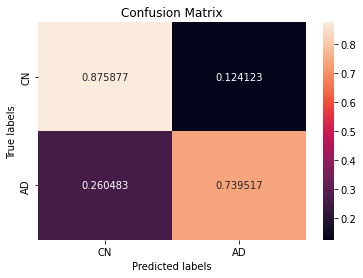

Resultat Fold:1
Loss: 0.000 | Acc: 0.833 | BAcc: 0.823 | SEN: 0.733 | SPE: 0.912 | PRE: 0.868 | F1: 0.795 | AUC: 0.823
Resultat Fold:2
Loss: 0.000 | Acc: 0.853 | BAcc: 0.859 | SEN: 0.911 | SPE: 0.807 | PRE: 0.788 | F1: 0.845 | AUC: 0.859
Resultat Fold:3
Loss: 0.000 | Acc: 0.755 | BAcc: 0.746 | SEN: 0.652 | SPE: 0.839 | PRE: 0.769 | F1: 0.706 | AUC: 0.746
Resultat Fold:4
Loss: 0.000 | Acc: 0.832 | BAcc: 0.826 | SEN: 0.778 | SPE: 0.875 | PRE: 0.833 | F1: 0.805 | AUC: 0.826
Resultat Fold:5
Loss: 0.000 | Acc: 0.812 | BAcc: 0.802 | SEN: 0.711 | SPE: 0.893 | PRE: 0.842 | F1: 0.771 | AUC: 0.802
Resultat Final:
Loss: 0.000 | Acc: 0.817 | BAcc: 0.811 | SEN: 0.757 | SPE: 0.865 | PRE: 0.820 | F1: 0.784 | AUC: 0.811


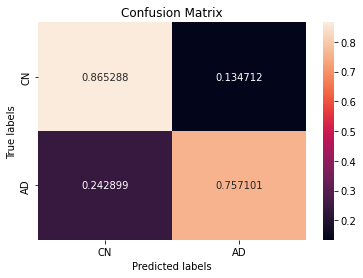

[0.0,
 0.8169481654047758,
 0.8111948349133703,
 0.7571014492753623,
 0.8652882205513786,
 0.820310391363023,
 0.7844211878147667,
 0.8111948349133703,
 array([[0.86528822, 0.13471178],
        [0.24289855, 0.75710145]])]

In [ ]:
cuts=['cut_2_3_2','cut_3_3_1','cut_1_3_1','cut_3_2_2','cut_1_3_2','cut_3_3_2','cut_2_2_2','cut_2_3_3','cut_2_4_2','cut_1_2_2']

EXPERIMENTFOLDER ='Cuts5fold/'
carpeta = TFG_DATA+PROBLEMTYPE+"/"+EXPERIMENTFOLDER

dataset = database.ADNI_Dataset( DS_INFO ,TFG_DATA + DATASET)
dataset.setProblem(PROBLEMTYPE)

models =[]
for cut in cuts:

  ex_carpeta = carpeta + cut + "/"
  models.append(ex_carpeta)  

ensamble.crossValidateVoteMax(models, device, dataset,verbose=True)
ensamble.crossValidateVoteMax(models, device, dataset,voteType="Soft",verbose=True)